* https://aroussi.com/post/python-yahoo-finance

In [1]:
!pip install yfinance==0.2.4;
import yfinance as yf;
import pandas as pd;

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
apple = yf.Ticker("AAPL"); # Ticker allow you to access the market data

In [3]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/data/apple.json; # download the url data

--2023-06-26 09:11:06--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/data/apple.json
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5699 (5.6K) [application/json]
Saving to: ‘apple.json’

apple.json          100%[===================>]   5.57K  --.-KB/s    in 0s      

2023-06-26 09:11:06 (688 MB/s) - ‘apple.json’ saved [5699/5699]



In [26]:
import json;
with open("apple.json") as json_file:
  apple_info = json.load(json_file); # load json file to apple_info, which is a dictionary
print(apple_info);
print(type(apple_info));

print(apple_info["country"]); # get the country
print(apple_info["volume"]);

{'zip': '95014', 'sector': 'Technology', 'fullTimeEmployees': 100000, 'longBusinessSummary': 'Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. It also sells various related services. In addition, the company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; AirPods Max, an over-ear wireless headphone; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, HomePod, and iPod touch. Further, it provides AppleCare support services; cloud services store services; and operates various platforms, including the App Store that allow customers to discover and download applications and digital content, such as books, music, video, games, and podcasts. Additionally, the company offers various services, such as Apple Arcade, a game subscription service; Apple Music, which offers users a curated listening experience with o

<class 'pandas.core.frame.DataFrame'>
                               Open      High       Low     Close     Volume  \
Date                                                                           
1980-12-12 00:00:00-05:00  0.099584  0.100017  0.099584  0.099584  469033600   
1980-12-15 00:00:00-05:00  0.094821  0.094821  0.094388  0.094388  175884800   
1980-12-16 00:00:00-05:00  0.087893  0.087893  0.087461  0.087461  105728000   
1980-12-17 00:00:00-05:00  0.089625  0.090058  0.089625  0.089625   86441600   
1980-12-18 00:00:00-05:00  0.092224  0.092657  0.092224  0.092224   73449600   

                           Dividends  Stock Splits  
Date                                                
1980-12-12 00:00:00-05:00        0.0           0.0  
1980-12-15 00:00:00-05:00        0.0           0.0  
1980-12-16 00:00:00-05:00        0.0           0.0  
1980-12-17 00:00:00-05:00        0.0           0.0  
1980-12-18 00:00:00-05:00        0.0           0.0  
469033600
469033600.0


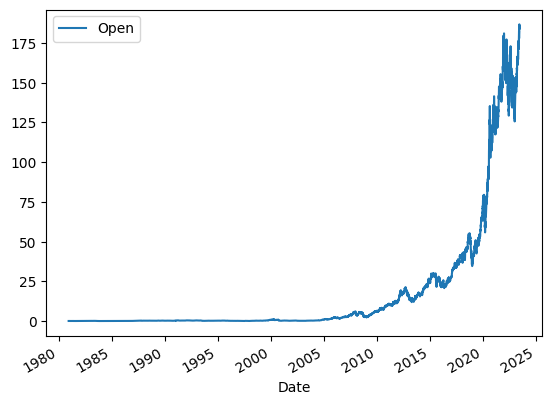

In [44]:
# Extract Share Price
# history() can get history data, and parameter "period" can control how far back we want to extract
apple_share_price_data = apple.history(period = "max");
#print(apple_share_price_data); with the attribute "Open", "High", "Low", "Close", "Volume", "Dividends", "Stock Splits"
print(type(apple_share_price_data));
print(apple_share_price_data.head());
print(apple_share_price_data["Volume"].iloc[0]);
print(apple_share_price_data.iloc[0][4]); # be aware of the index
apple_share_price_data.reset_index(inplace = True); # reset the index(before the index is date), and the inplace means changing in dataframe
#rint(apple_share_price_data);
#print(apple_share_price_data["Volume"]);

# Plot the open versus date
apple_share_price_data.plot(x = "Date", y = "Open");

Date
1987-05-11 00:00:00-04:00    0.000536
1987-08-10 00:00:00-04:00    0.000536
1987-11-17 00:00:00-05:00    0.000714
1988-02-12 00:00:00-05:00    0.000714
1988-05-16 00:00:00-04:00    0.000714
                               ...   
2022-05-06 00:00:00-04:00    0.230000
2022-08-05 00:00:00-04:00    0.230000
2022-11-04 00:00:00-04:00    0.230000
2023-02-10 00:00:00-05:00    0.230000
2023-05-12 00:00:00-04:00    0.240000
Name: Dividends, Length: 79, dtype: float64


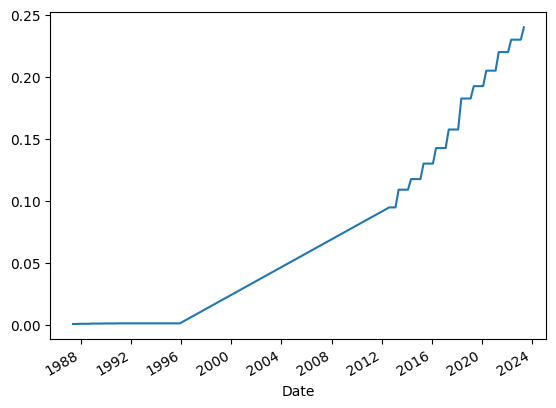

In [45]:
# Extract Dividends
print(apple.dividends);
apple.dividends.plot();